In [1]:
#https://github.com/sararob?tab=repositories

In [2]:
import os

import numpy as np
import pylab
import tensorflow as tf

# A special command for IPython Notebooks that
# intructs Matplotlib to display plots in the notebook
%matplotlib inline

In [3]:
# This is a directory we'll use to store information
# about the graph to later visualize in TensorBoard.
# By default, it will be created in the same directory
# as this notebook. 

# Be sure to delete the contents of this directory before
# running the script.
LOGDIR = './graphs'

In [4]:
tf.reset_default_graph()
sess = tf.Session()

In [5]:
def make_noisy_data(m=0.1, b=0.3, n=100):
    x = np.random.rand(n).astype(np.float32)
    noise = np.random.normal(scale=0.01, size=len(x))
    y = m * x + b + noise
    return x, y

In [6]:
x_train, y_train = make_noisy_data()
x_test, y_test = make_noisy_data()

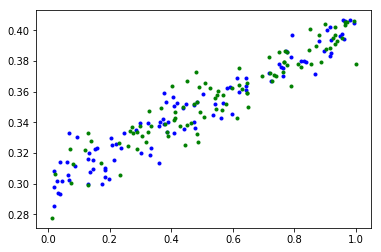

In [7]:
pylab.plot(x_train, y_train, 'b.')
pylab.plot(x_test, y_test, 'g.')

In [8]:
with tf.name_scope('input'):
    x_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='x-input')
    y_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='y-input')


In [9]:
print(x_placeholder)
print(y_placeholder)

Tensor("input/x-input:0", shape=(?,), dtype=float32)
Tensor("input/y-input:0", shape=(?,), dtype=float32)


In [10]:
with tf.name_scope('model'):
    m = tf.Variable(tf.random_normal([1]), name='m')
    b = tf.Variable(tf.random_normal([1]), name='b')
    # This is the same as y = tf.add(tf.mul(m, x_placeholder), b), but looks nicer
    y = m * x_placeholder + b


In [11]:
print(m)
print(b)
print(y)

<tf.Variable 'model/m:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'model/b:0' shape=(1,) dtype=float32_ref>
Tensor("model/add:0", shape=(?,), dtype=float32)


### Define a loss function (here, squared error) and an optimizer (here, gradient descent).

In [12]:
LEARNING_RATE = 0.5

with tf.name_scope('training'):
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.square(y - y_placeholder))
    with tf.name_scope('optimizer'):
        optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
        train = optimizer.minimize(loss)


In [13]:
print("loss:", loss)
print("optimizer:", optimizer)
print("train_step:", train)

loss: Tensor("training/loss/Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x18208fc588>
train_step: name: "training/optimizer/GradientDescent"
op: "NoOp"
input: "^training/optimizer/GradientDescent/update_model/m/ApplyGradientDescent"
input: "^training/optimizer/GradientDescent/update_model/b/ApplyGradientDescent"



In [14]:
# Write the graph
writer = tf.summary.FileWriter(LOGDIR)
writer.add_graph(sess.graph)

# Attach summaries to Tensors (for TensorBoard visualization)
tf.summary.histogram('m', m)
tf.summary.histogram('b', b)
tf.summary.scalar('loss', loss)

# This op will calculate our summary data when run
summary_op = tf.summary.merge_all()

In [15]:
sess.run(tf.global_variables_initializer())

In [16]:
TRAIN_STEPS = 201

for step in range(TRAIN_STEPS):
    
    # Session will run two ops:
    # - summary_op prepares summary data we'll write to disk in a moment
    # - train will use the optimizer to adjust our variables to reduce loss
    summary_result, _ = sess.run([summary_op, train], 
                                  feed_dict={x_placeholder: x_train, 
                                             y_placeholder: y_train})
    # write the summary data to disk
    writer.add_summary(summary_result, step)
    
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([m, b]))
    
# close the writer when we're finished using it
writer.close()

0 [array([ 0.95772135], dtype=float32), array([-0.37114078], dtype=float32)]
20 [array([ 0.30925882], dtype=float32), array([ 0.19688934], dtype=float32)]
40 [array([ 0.14737254], dtype=float32), array([ 0.27703014], dtype=float32)]
60 [array([ 0.11227407], dtype=float32), array([ 0.2944054], dtype=float32)]
80 [array([ 0.10466441], dtype=float32), array([ 0.29817253], dtype=float32)]
100 [array([ 0.10301457], dtype=float32), array([ 0.29898927], dtype=float32)]
120 [array([ 0.10265686], dtype=float32), array([ 0.29916635], dtype=float32)]
140 [array([ 0.10257931], dtype=float32), array([ 0.29920474], dtype=float32)]
160 [array([ 0.10256251], dtype=float32), array([ 0.29921305], dtype=float32)]
180 [array([ 0.10255884], dtype=float32), array([ 0.29921487], dtype=float32)]
200 [array([ 0.10255806], dtype=float32), array([ 0.29921526], dtype=float32)]


In [17]:
print ("m: %f, b: %f" % (sess.run(m), sess.run(b)))

m: 0.102558, b: 0.299215


In [18]:
# Use the trained model to make a prediction!
# Remember that x_placeholder must be a vector, hence [2] not just 2.
# We expect the result to be (about): 2 * 0.1 + 0.3 + noise ~= 0.5
sess.run(y, feed_dict={x_placeholder: [2]})

array([ 0.50433135], dtype=float32)

In [19]:
# To start TensorBoard, run this command from a terminal
# Note: you should run this from the same directory that contains this notebook
# or, provide absolute path to the 'graphs' directory
# If you are runnining in a virtualenv, be sure to start it
# if you open a new terminal window.

# $ tensorboard --logdir=graphs

# To open TensorBoard, point your browser to http://localhost:6006
# Then, click on the tabs for 'scalars', 'distributions', 'histograms', and 'graphs'
# to learn more.

# If you run into trouble, delete LOGDIR (to clear information from previous runs),
# then re-run this script, and restart TensorBoard.